# HW 5

* Due on **Wed, Mar-5-2024** during reading week (1pm)
* Please comment your code and upload the Jupyter notebook file to https://www.dropbox.com/request/HwZIxhQbg4eKPPwXADLy
* Q&A: Team or email

### 1. Load the following datasets into Pandas dataframes and print out the first 8 rows (30%)

- Given the data sets "ElementalAbundances.txt". Here are more information about the data file:
    - the data file is a "tab (\t)" delimited .txt file
    - the header is in the first line (0)

- The mean temperature data recorded at Geneva is in the file "159464-TAVG-Data.txt". Make sure you use the options "**skiprows**" and "**delim_whitespace**" in order to get the data frame properly. 

- Download the data file "SP_DeltaTime.txt" and load it into Python as a data frame using the pandas function .read_csv(). 
  
_NOTE_:
   - We need to use the keyword argument **skiprows** in the read_csv() function to get the dataframe. 
   - **pd.read_csv( )** reads 'comma separated variables' by default but this file is _whitespace_ delimited. _whitespace_ is either spaces or tabs.   The keyword argument **delim_whitespace=True** will split on white space.
   


In [4]:
import pandas as pd

E_M = pd.read_csv("./ElementalAbundances.txt", delimiter="\t")
T_A = pd.read_csv("./159464-TAVG-Data.txt",skiprows=93,delim_whitespace=True)
SP_D = pd.read_csv("./SP_DeltaTime.txt",skiprows=2,delim_whitespace=True)
print(E_M.loc[0:7])
print('\n')
print(T_A.loc[0:7])
print('\n')
print(SP_D.loc[0:7])

   AtomicNumber Symbol       Name         Solar        System
0             1      H   hydrogen  2.800000e+04  2.800000e+04
1             2     He     helium  2.700000e+03  2.700000e+03
2             3     Li    lithium  4.000000e-07  5.700000e-05
3             4     Be  beryllium  4.000000e-07  7.000000e-07
4             5      B      boron  1.100000e-05  2.100000e-05
5             6      C     carbon  1.000000e+01  1.000000e+01
6             7      N   nitrogen  3.100000e+00  3.100000e+00
7             8      O     oxygen  2.400000e+01  2.400000e+01


   Year  Month  Temperature  Anomaly  Failed  Breaks  Temperature1  Anomaly1  \
0  1752      1          NaN      NaN     NaN     NaN           NaN       NaN   
1  1752      2          NaN      NaN     NaN     NaN           NaN       NaN   
2  1752      3          NaN      NaN     NaN     NaN           NaN       NaN   
3  1752      4          NaN      NaN     NaN     NaN           NaN       NaN   
4  1752      5          NaN      NaN    

### 2. Seismology, P-waves and S-waves (30%)

The farther away an earthquake is from a receiver, the more time there is between the arrivals of the P and S waves.  This makes sense if you think about racing a little kid (who is on a tricycle) around a track.  The distance between you will just keep increasing as you run because the kid on the trike is slower (like the S wave). [Well, until you lap the little tyke.] 

You can use the difference between the arrival times of the two waves to calculate the distance to the earthquake source, if we know the velocities of the waves through the Earth.  So first we need to know how these two waves behave.  

There are plenty of data on earthquakes and the arrival times of different waves. Here is a short video demonstration. 

https://www.iris.edu/hq/inclass/animation/traveltime_curves_how_they_are_created  

- The data file is "SP_DeltaTime.txt", you have already done the dataframe loading part, do the following analysis based on the dataframe you've got;
- Use the head() function to take a look at what datasets are included in the data frame. We see that the  columns of **DeltaTimeData**  are: 
    - "Deg": the degrees away from the source (the angle from the center of the Earth)
    - "M": the time of the P wave arrival in minutes
    - "S": the  P wave arrival in seconds
    - "M.1": the difference in the P and S wave arrival time in  minutes and 
    - "S.1" is same interval in seconds.  
- Change the column names to be "Degrees", "P_wave_minutes", "P_wave_seconds", "S-P_minutes", "S-P_seconds"
- What we really want for calculating the seismology is the arrival time in **decimal minutes**, not  minutes and seconds as in this data file.  Now defining a new column called "P_decimal_minutes" by converting the seconds data to decimal minutes (divide by 60) and add that to the minutes. 
- Now create another new column called "S-P_decimal_minutes" using the "S-P_minutes" and "S-P_seconds"
- Which one travels faster? Estimate the mean speed for the P-waves and S-waves
- **[Extra Credit (10%)]** Calculate wave speeds of P-wave and S-wave as a function of time, make a separate plot to show it.


 --- initial dataframe of SP_DeltaTime is --- 
   Deg  M     S  M.1   S.1
0  0.0  0   5.4    0   4.0
1  0.5  0  10.6    0   7.8
2  1.0  0  17.7    0  13.5
3  1.5  0  24.6    0  19.0
4  2.0  0  31.4    0  24.4


--- the mean speed of P waves is 7.601315832614249 km/s
--- the mean speed of S waves is 4.068341162938366 km/s


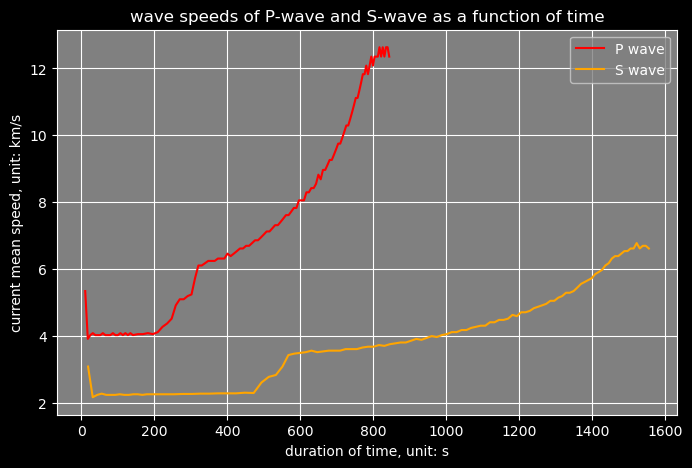

In [5]:
import numpy as np
import matplotlib.pyplot as plt

R = 6371

print(" --- initial dataframe of SP_DeltaTime is --- ")
print(SP_D.head())

# rename the columns
SP_D.rename(columns={'Deg':'Degrees','M':'P_wave_minutes',\
    'S':'P_wave_seconds','M.1':'S-P_minutes','S.1':'S-P_seconds'},inplace=True)
# add new columns
SP_D['P_decimal_minutes'] = SP_D['P_wave_seconds']/60 + SP_D['P_wave_minutes']
SP_D['S-P_decimal_minutes'] = SP_D['S-P_seconds']/60 + SP_D['S-P_minutes']
SP_D['P_seconds'] = SP_D['P_wave_seconds'] + SP_D['P_wave_minutes']*60
SP_D['S_seconds'] = SP_D['P_seconds'] + SP_D['S-P_seconds'] + SP_D['S-P_minutes']*60


# unit: km
delta_distance = np.array([np.pi*R*(SP_D.loc[index]['Degrees']-SP_D.loc[index-1]['Degrees'])/360 \
    for index in range(1,len(SP_D['Degrees']))])
# unit: s
delta_time_P = np.array([ SP_D.loc[index]['P_seconds']-SP_D.loc[index-1]['P_seconds']\
    for index in range(1,len(SP_D['P_seconds']))])
delta_time_S = np.array([ SP_D.loc[index]['S_seconds']-SP_D.loc[index-1]['S_seconds']\
    for index in range(1,len(SP_D['S_seconds']))])
# compute each mean speed respectively
mean_P_list = delta_distance/delta_time_P
mean_S_list = delta_distance/delta_time_S
mean_P = np.sum(mean_P_list)/len(mean_P_list)
mean_S = np.sum(mean_S_list)/len(mean_S_list)
print("\n")
print("--- the mean speed of P waves is", mean_P,"km/s")
print("--- the mean speed of S waves is", mean_S,"km/s")


fig = plt.figure(figsize=(8,5))
plt.xlabel("duration of time, unit: s")
plt.ylabel("current mean speed, unit: km/s")
plt.title("wave speeds of P-wave and S-wave as a function of time")
plt.plot(list(SP_D['P_seconds'])[1:], mean_P_list,'r', label="P wave")
plt.plot(list(SP_D['S_seconds'])[1:], mean_S_list,'orange', label="S wave")
plt.legend()
plt.grid()
plt.show()




### 3. GDP versus Life expectancy (40%)

- Download the data file named "life-expectancy-vs-gdp-per-capita.csv" from Moodle, this is the whole dataset of life expectance versus GDP for all the countries over the world (year 1952 - 2021)
- Load the data file into a Pandas data Frame using the read_csv() function
- Clear your data sets by e.g., remove NaNs, remove the outliers in your dataset if necessary
- Now make a similar bubble plot of GDP versus Life Exp for year **2015** (e.g., https://www.gapminder.org/tag/life-expectancy/) with all the continents, by setting the size of the bubbles using the population and the color of the bubbles based on the continent, using the following definitions: 
    - Asia and Oceania (red)
    - Europe (yellow)
    - Africa (cyan)
    - North & South America (yellow)
- Mark the countries "China" and "India" in your plot. Other country names are optional - depends on how busy your plots are
- Hint: 1) take a look at the data file before analysis; and 2) you can use a **for**-loop to generate the bubble plot (or whatever way you prefer).
- Generate a similar plot for year 1998 and 2018

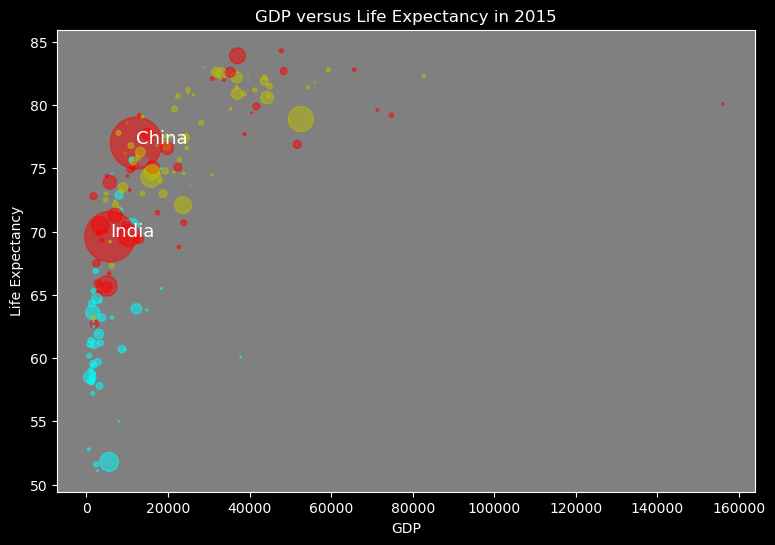

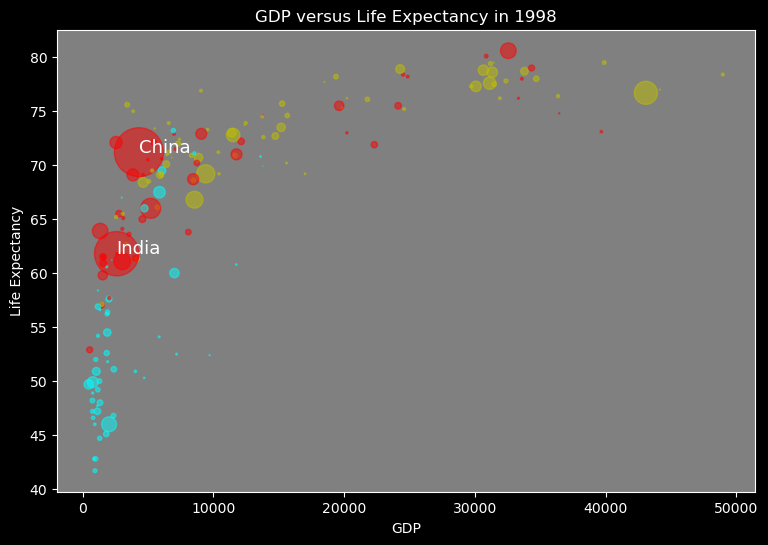

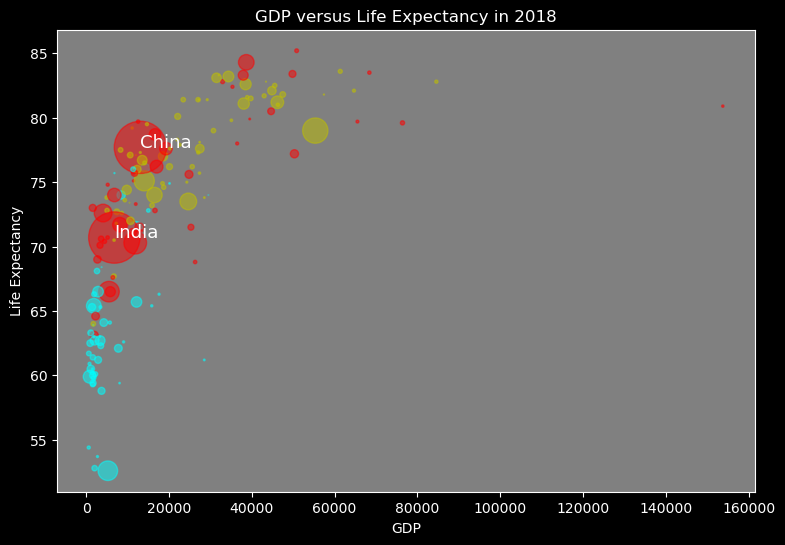

In [28]:
import matplotlib.pyplot as plt

le_gdp = pd.read_csv("./life-expectancy-vs-gdp-per-capita.csv",delimiter=',')

# rename: make it more convenient
le_gdp.rename(columns={'Entity':'region',\
        'Life expectancy at birth (historical)':'life',\
            'GDP per capita':'gdp','Continent':'continent'\
                ,'Population (historical estimates)':'population'},inplace=True)
le_gdp = le_gdp.fillna(0)

# how to remove outliers? what is the defination of outliers in this circumstance?

def data_filter(year=None, known_region=None):
    if year == 2015:
        valid_index = (le_gdp['Year']==year)&(le_gdp['region']!=0)&\
                (le_gdp['continent']!=0)&(le_gdp['gdp']!=0) &(le_gdp['population']!=0)
        le_gdp_needed = le_gdp[valid_index]
        temp = zip(le_gdp_needed['region'],le_gdp_needed['continent'])
        # save the (country, continent) pairs we know
        region_con = dict(temp)
        return le_gdp_needed, region_con
    else:
        valid_index = []
        real_continent = []
        known_region_list = list(known_region.keys())

        # do not filter 'continent'
        valid_index_1 = (le_gdp['Year']==year)&(le_gdp['region']!=0)\
            &(le_gdp['gdp']!=0) &(le_gdp['population']!=0)
        le_gdp_needed = le_gdp[valid_index_1]

        # filter 'continent' -- revise initial datafram!!!
        for index in range(0,len(le_gdp_needed['Year'])):
            if le_gdp_needed.iat[index,7]!=0:
                continue
            elif le_gdp_needed.iat[index,0] in known_region_list:
                le_gdp_needed.iat[index,7] = known_region[le_gdp_needed.iat[index,0]]
        valid_index_2 = le_gdp_needed['continent']!=0
        le_gdp_real = le_gdp_needed[valid_index_2]

        return le_gdp_real

def draw_image(year = 2015, data_needed = None, real_continent = None):
    if len(data_needed) == 0:
        print("No valid data available")
        return
    filter_China = data_needed['region'] == 'China'
    filter_India = data_needed['region'] == 'India'
    china_gdp = data_needed[filter_China]['gdp'];china_life = data_needed[filter_China]['life']
    India_gdp = data_needed[filter_India]['gdp'];India_life = data_needed[filter_India]['life']

    color_dict = {'Asia':'r','Oceania':'r','Europe':'y','Africa':'cyan',\
        'South America':'y','North America':'y'}
    color_list = [color_dict[item] for item in data_needed['continent']]
    bubble_size = [item/1000000 for item in data_needed['population']]

    x_gdp = data_needed['gdp']
    y_life = data_needed['life']

    fig = plt.figure(figsize=(9,6))
    plt.rcParams['axes.facecolor'] = 'gray'
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy')
    plt.title("GDP versus Life Expectancy in {0}".format(year))
    plt.scatter(x_gdp, y_life, bubble_size, color=color_list, alpha=0.5)
    plt.text(china_gdp,china_life,'China',fontsize=13)
    plt.text(India_gdp,India_life,'India',fontsize=13)
    plt.show()


data, region_con = data_filter(year=2015)
draw_image(year=2015, data_needed=data)

data = data_filter(year=1998, known_region=region_con)
draw_image(year=1998, data_needed=data)

data = data_filter(year=2018, known_region=region_con)
draw_image(year=2018, data_needed=data)



